In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [263]:
data_train=pd.DataFrame(pd.read_csv("/content/train.csv"))
data_test=pd.DataFrame(pd.read_csv("/content/test.csv"))
print(data_train.shape)
print(data_test.shape)

(14999, 9)
(8764, 8)


In [264]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [265]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [266]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_test["category"]=data_test["category"].map(category)
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [267]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [268]:
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [269]:
data_train['views']=pd.to_numeric(data_train['views'])
data_train['likes']=pd.to_numeric(data_train['likes'])
data_train['dislikes']=pd.to_numeric(data_train['dislikes'])
data_train['adview']=pd.to_numeric(data_train['adview'])

In [270]:
data_test['views']=pd.to_numeric(data_test['views'])
data_test['likes']=pd.to_numeric(data_test['likes'])
data_test['dislikes']=pd.to_numeric(data_test['dislikes'])

In [271]:
from sklearn.preprocessing import LabelEncoder
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

In [272]:
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])

In [273]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,PT7M37S,6
1,2741,2,1707,56,2,6,2185,PT9M30S,4
2,8138,1,2023,25,0,2,2094,PT2M16S,3
3,9005,6,620860,777,161,153,2119,PT4M22S,8
4,122,1,666,1,0,0,2091,PT31S,4


In [274]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,PT7M29S,2
1,3444,1040132,8171,340,1047,1825,PT6M29S,6
2,1593,28534,31,11,1,1009,PT37M54S,4
3,3775,1316715,2284,250,274,116,PT9M55S,7
4,7644,1893173,2519,225,116,1892,PT3M8S,2


In [275]:
import time
import datetime

In [276]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if (i=="H"):
        h = mm
        mm = ''
      elif (i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
    if(h==''):
      h = '00'
    if(m == ''):
      m = '00'
    if(s==''):
      s='00'
    bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
mp = pd.read_csv("/content/train.csv")["duration"]
mp1 = pd.read_csv("/content/test.csv")["duration"]
time_train = mp.apply(checki)
time_test = mp1.apply(checki)

In [277]:
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)
time1=time_train.apply(func_sec)
time2=time_test.apply(func_sec)
data_train["duration"]=time1
data_test["duration"]=time2
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [278]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


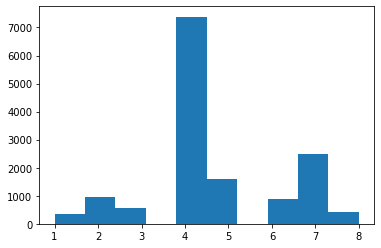

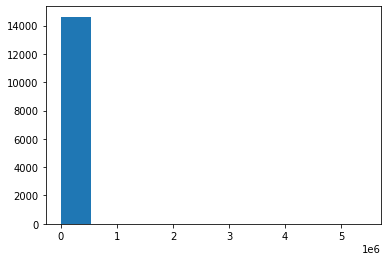

In [279]:
plt.hist(data_train['category'])
plt.show()
plt.hist(data_train['adview'])
plt.show()
data_train=data_train[data_train["adview"]<2000000]

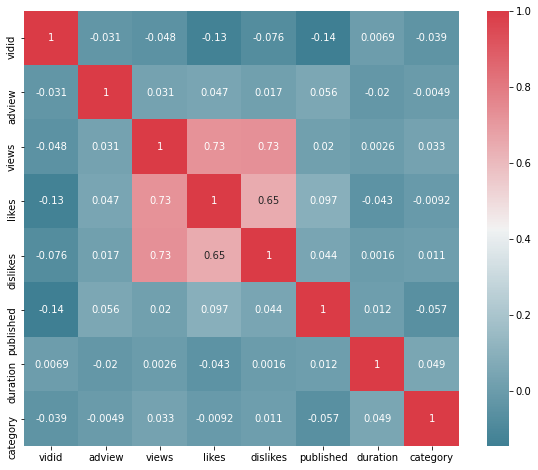

In [280]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr=data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [281]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [282]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [283]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_test=data_test.drop(["vidid"],axis=1)
data_train.head()


,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [284]:
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.1, random_state=42)
X_train.shape

(13172, 7)

In [286]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1737489810736368

In [287]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [288]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3153.47043710617
Mean Squared Error: 109384710.11443
Root Mean Squared Error: 10458.714553635642


In [289]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3153.47043710617
Mean Squared Error: 109384710.11443
Root Mean Squared Error: 10458.714553635642


In [290]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 2070.217896174863
Mean Squared Error: 279016133.10040987
Root Mean Squared Error: 16703.77601323754


In [291]:
data_test=scaler.fit_transform(data_test)
Predictions=pd.DataFrame(decision_tree.predict(data_test))
print(Predictions)

         0
0      1.0
1      4.0
2      2.0
3     42.0
4      6.0
...    ...
8544  14.0
8545   2.0
8546  12.0
8547   1.0
8548  18.0

[8549 rows x 1 columns]


In [292]:
Predictions.to_csv(r'Predictions_Submission.csv', index = False)

In [293]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 2799.730609689753
Mean Squared Error: 162307811.02926168
Root Mean Squared Error: 12740.008282150435


In [294]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [295]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)


Epoch 1/100
412/412 [==============================] - 0s 1ms/step - loss: 855923968.0000 - mean_squared_error: 855923968.0000
Epoch 2/100
412/412 [==============================] - 0s 1ms/step - loss: 855919104.0000 - mean_squared_error: 855919104.0000
Epoch 3/100
412/412 [==============================] - 0s 1ms/step - loss: 855906688.0000 - mean_squared_error: 855906688.0000
Epoch 4/100
412/412 [==============================] - 0s 1ms/step - loss: 855877888.0000 - mean_squared_error: 855877888.0000
Epoch 5/100
412/412 [==============================] - 0s 1ms/step - loss: 855830208.0000 - mean_squared_error: 855830208.0000
Epoch 6/100
412/412 [==============================] - 0s 1ms/step - loss: 855762048.0000 - mean_squared_error: 855762048.0000
Epoch 7/100
412/412 [==============================] - 0s 1ms/step - loss: 855668608.0000 - mean_squared_error: 855668608.0000
Epoch 8/100
412/412 [==============================] - 0s 975us/step - loss: 855555648.0000 - mean_squared_erro

In [296]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")